In [2]:
import pandas as pd
train = pd.read_csv("./bike-sharing-demand/train.csv")
train.head()
orginal_train = train.copy()

In [3]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
datetime = ['year','month','day','hour','minute','second']
train[datetime] = train['datetime'].apply(lambda x: pd.Series([x.year, x.month, x.day, x.hour, x.minute, x.second]))

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


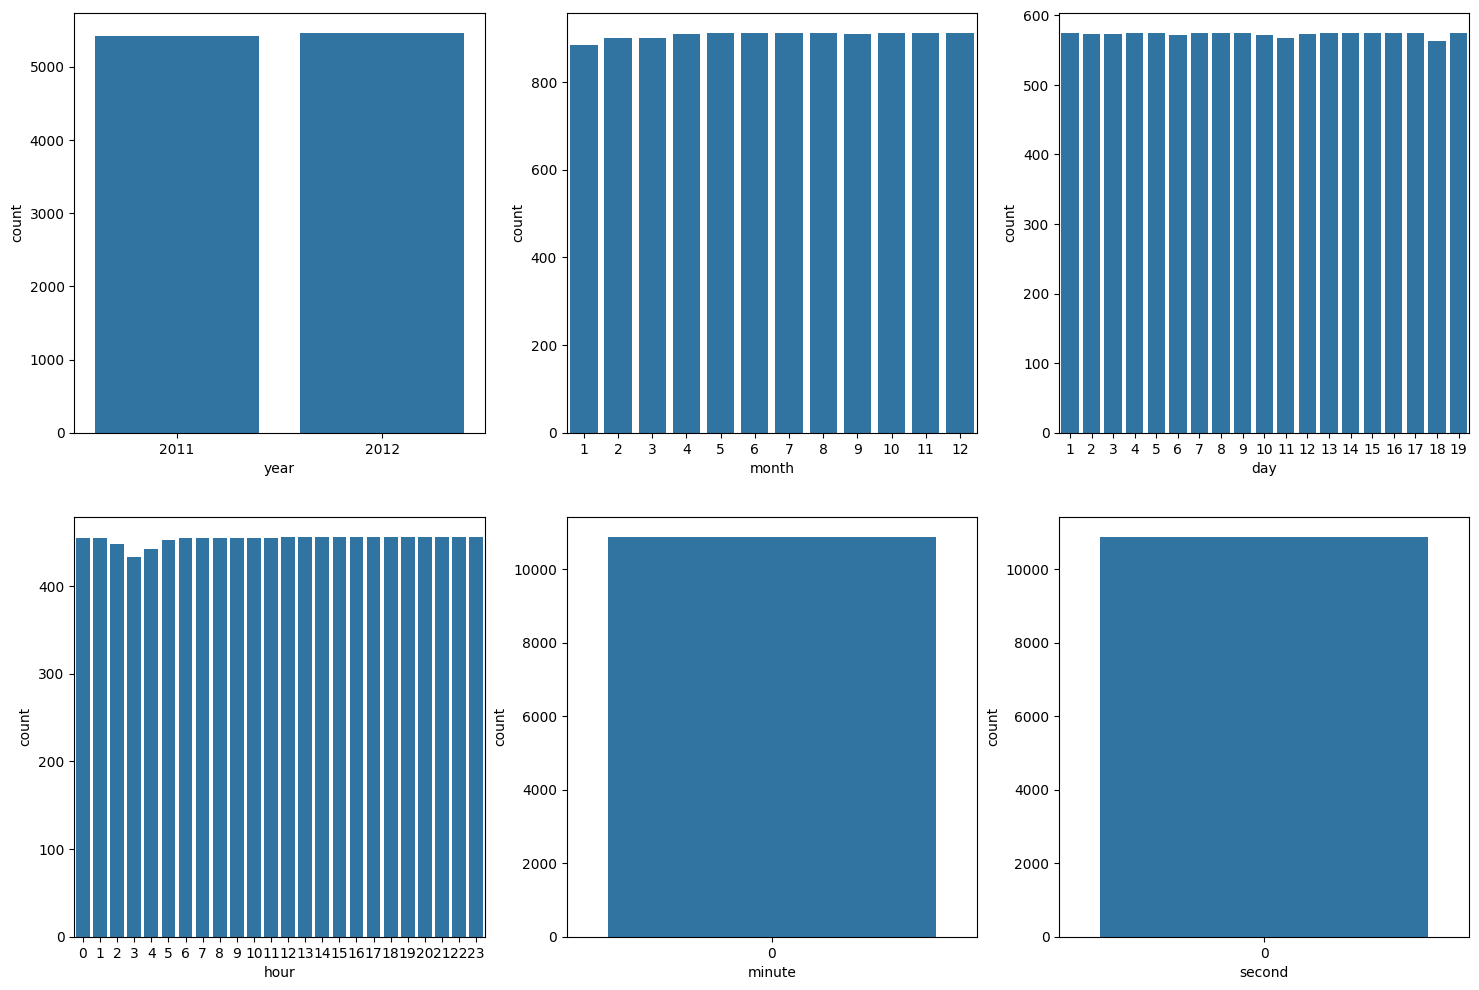

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18, 12))

for i,col in enumerate(datetime):
    plt.subplot(2,3,i+1)
    sns.countplot(data=train,x=col)

plt.show()

In [16]:
x_columns=['season','holiday','workingday','weather','temp','atemp'	,'humidity'	,'windspeed','month','day','hour']

In [17]:
X= train[x_columns]
y=train['count']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [22]:
(X_train.shape,X_test.shape)

((8164, 11), (2722, 11))

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse : ",mse)
print("rmse : ",rmse)

mse :  21540.903225545302
rmse :  146.76819555184736


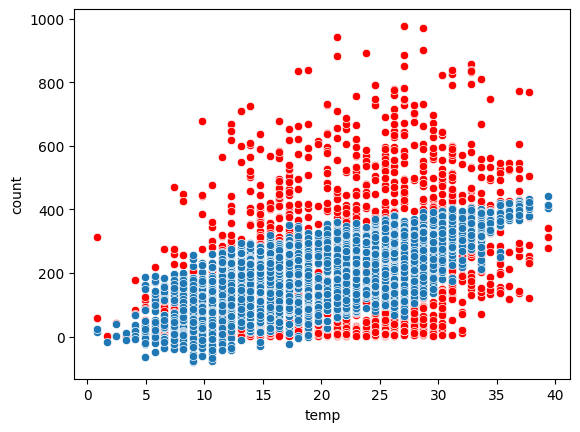

In [ ]:
plt.figure()
sns.scatterplot(x=X_test['temp'],y=y_test,color='r')
sns.scatterplot(x=X_test['temp'],y=y_pred)
plt.show()


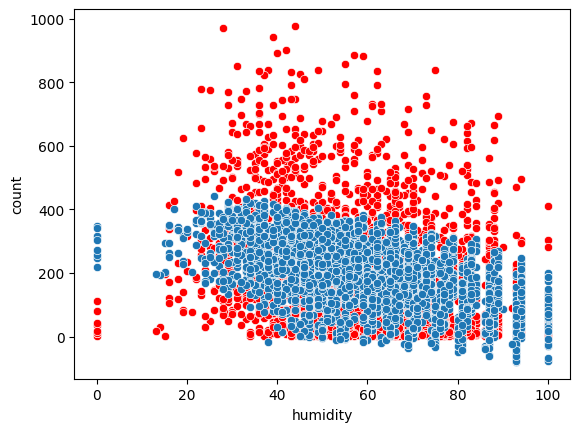

In [39]:
plt.figure()
sns.scatterplot(x=X_test['humidity'],y=y_test,color='r')
sns.scatterplot(x=X_test['humidity'],y=y_pred)
plt.show()